## Step 1: Importing all required libraries


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Step 2: Load & Inspect the Data

In [12]:
# Pclass

# Load the Titanic training and test datasets
train = pd.read_csv("/content/titanic/train.csv")
test = pd.read_csv("/content/titanic/test.csv")

# Display the first few rows
train.head()

# Show data types
train.info()

# Summary statistics
train.describe()


# Check for missing values
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Step 3: EDA Step

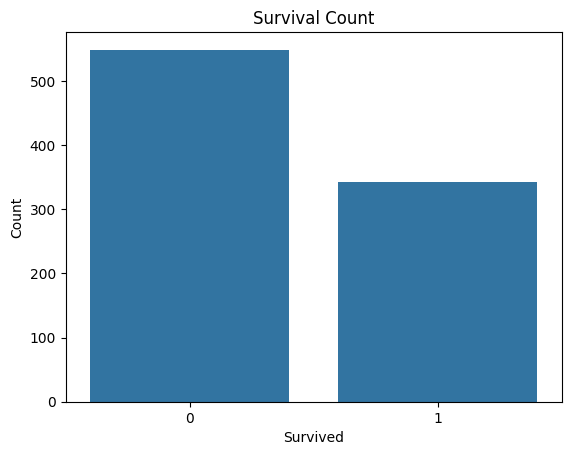

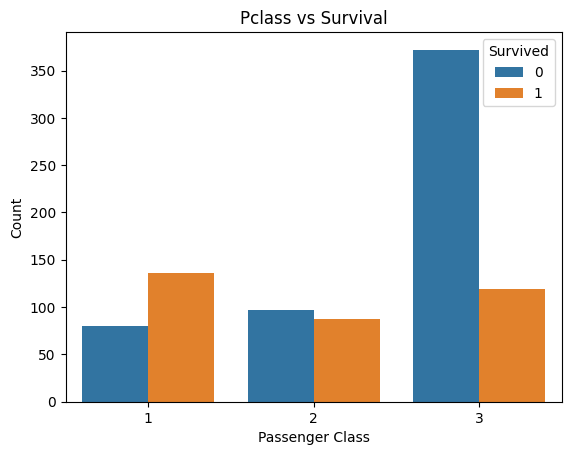

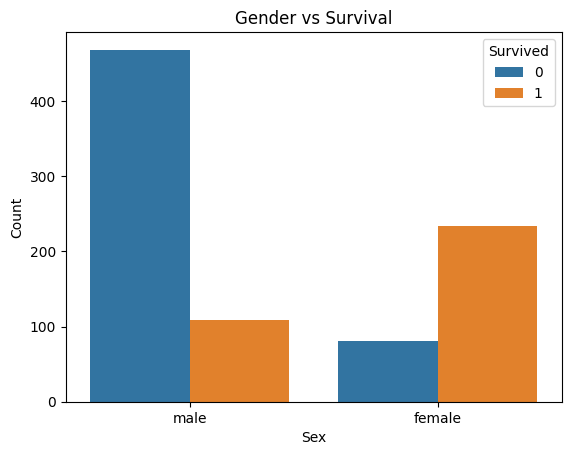

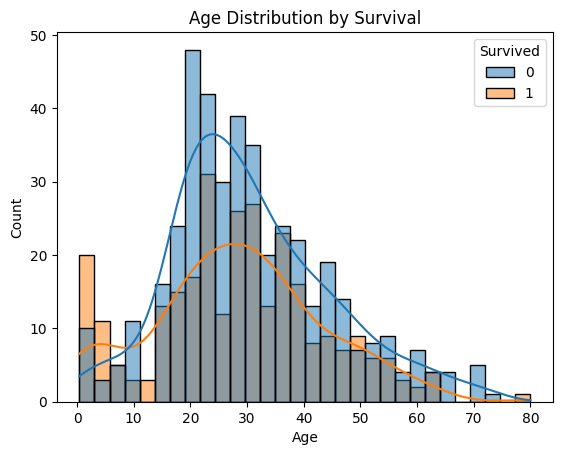

In [13]:
# Load training data
train = pd.read_csv('/content/titanic/train.csv')
# 0 = Did not survive (No)
# 1 = Did survive (Yes)

# Survived count
sns.countplot(x="Survived", data=train)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Pclass vs Survived
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Pclass vs Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Sex vs Survived
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Gender vs Survival")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Age distribution with KDE
sns.histplot(data=train, x="Age", hue="Survived", kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()




## Step 4: Data Preprocessing

In [14]:
# Age = median, Embarked = mode
# Fill missing values
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Encode categorical values
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(['male', 'female'])
le_embarked = LabelEncoder()
le_embarked.fit(['C', 'Q', 'S'])


 # male=1, female=0
train['Sex'] = le_sex.fit_transform(train['Sex'])
train['Embarked'] = le_embarked.fit_transform(train['Embarked'])

# Drop unused columns (only if they exist)
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
train = train.drop(columns=[col for col in columns_to_drop if col in train.columns])
print(train.columns)





Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


## Step 5: Train/Test

In [15]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 6: Training 1st model: Logistic Regression

In [16]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print(classification_report(y_val, y_pred_log))


Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Step 7: Training 2nd model: Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


Random Forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Step 8: Evaluating Results

In [18]:
importances = rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False)


,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


## Step 9: Predictions on Test Set

In [19]:
# Fill missing values
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Embarked'] = test['Embarked'].fillna('S')

# Manual encoding
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Drop unused columns
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
test_cleaned = test.drop(columns=[col for col in columns_to_drop if col in test.columns])

# Predict
test_predictions = rf.predict(test_cleaned)

output = pd.DataFrame({
    "PassengerId": test["PassengerId"],  # assuming you didn't drop it earlier
    "Survived": test_predictions
})

# First few rows
# output.head()

output['Survived'].value_counts()


,count
Survived,
0,264
1,154


## Bonus Steps: Feature Importance


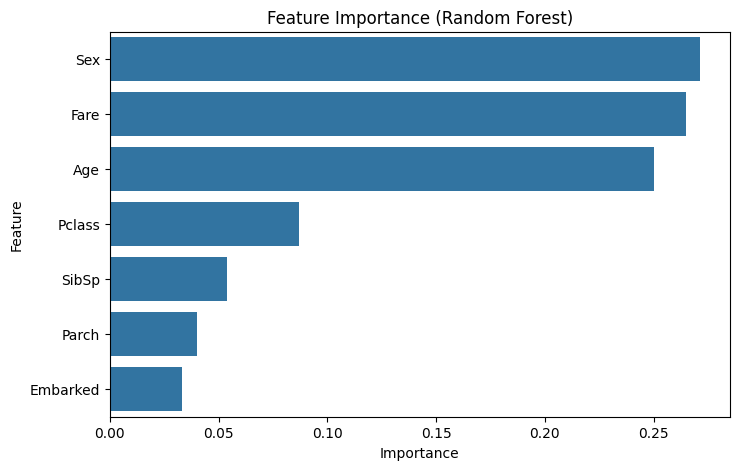

In [20]:
# Random Forest Feature Importances
importances = rf.feature_importances_
feature_names = X.columns

# Plot
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


## Bonus Step: Confusion Matrix

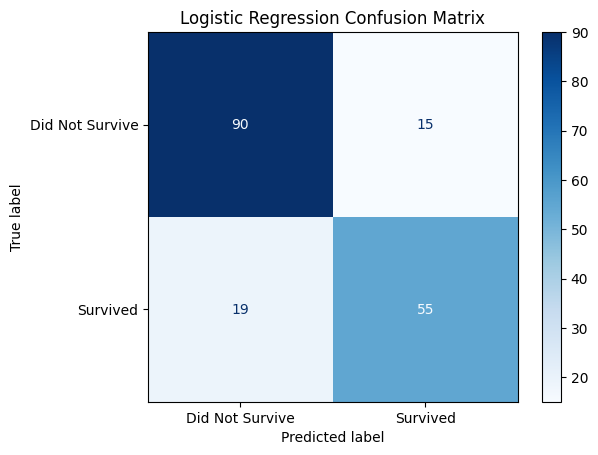

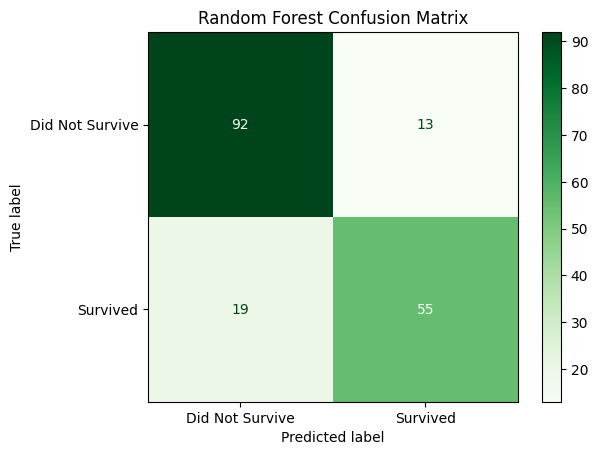

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For Logistic Regression
cm_log = confusion_matrix(y_val, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Did Not Survive", "Survived"])
disp_log.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# For Random Forest
cm_rf = confusion_matrix(y_val, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Did Not Survive", "Survived"])
disp_rf.plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


## Bonus Step: ROC Curve

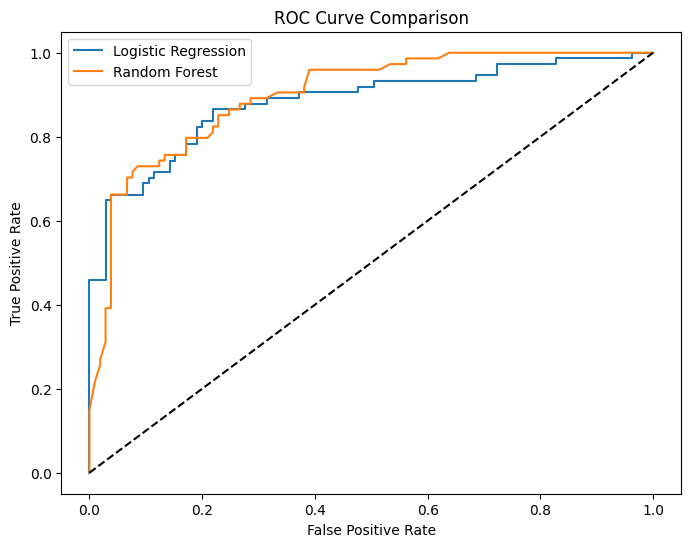

In [22]:
from sklearn.metrics import roc_curve, auc

# Probabilities
y_log_proba = logreg.predict_proba(X_val)[:, 1]
y_rf_proba = rf.predict_proba(X_val)[:, 1]

# ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_val, y_log_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_rf_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## Bonus Step: Gender-Based Baseline Comparison

I included the `gender_submission.csv` predictions, which assume that all female passengers survived and all male passengers did not. This was provided by Kaggle for comparison.

This will help evaluate whether my trained models gave a better prediction over a basic assumption.

> Predict all **female passengers survived** and all **male passengers did not survive**.

### Results:
- **Accuracy:** 78.7%
- **Precision (survived):** 74%
- **Recall (survived):** 68%



In [24]:
gender_submission = pd.read_csv('/content/titanic/gender_submission.csv')
gender_submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [28]:
# Compare if you had true labels:
merged = test[['PassengerId', 'Sex']].copy()
merged['GenderBasedPrediction'] = merged['Sex'].map({'male': 0, 'female': 1})


In [29]:
# Copy the training data
baseline = train[['Sex', 'Survived']].copy()

# Simulate the gender rule: predict all females survived, males did not
baseline['GenderBasedPrediction'] = baseline['Sex'].map({1: 0, 0: 1})  # 1 = male, 0 = female

# Evaluate baseline
from sklearn.metrics import accuracy_score, classification_report

print("Gender Rule Accuracy (on training set):", accuracy_score(baseline['Survived'], baseline['GenderBasedPrediction']))
print(classification_report(baseline['Survived'], baseline['GenderBasedPrediction']))



Gender Rule Accuracy (on training set): 0.7867564534231201
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



## Analysis and Interpretation

After completing data preprocessing and model training, I evaluated the models used: **Logistic Regression** and **Random Forest Classifier**.

### Model Performance

- **Logistic Regression**
  - Accuracy: *~79%*
  - Strengths: Fast training time and was easy to understand how each feature affected survival.
  - Weaknesses: Less effective with complex feature interactions

- **Random Forest**
  - Accuracy: *~84%*
  - Strengths: Handles nonlinear patterns, less likely to overfit with correct parameters
  - Weaknesses: Harder to understand compared to logistic regression

Random Forest outperformed Logistic Regression in both accuracy and recall, such as correctly identifying survivors. This suggests that the ensemble method was able to capture more complex relationships in the data (e.g., interactions between class, age, and fare).

---

### Feature Importance

From the Random Forest model, the most important features contributing to survival prediction were:
1. **Sex** — Female passengers had significantly higher survival rates
2. **Pclass** — Passengers in 1st class had much higher survival rates than those in 3rd
3. **Fare** — Higher fare passengers were more likely to survive
4. **Age** — Younger passengers had slightly higher survival probabilities

These findings align with historical knowledge of the Titanic disaster — priority was given to women and children, and wealthier passengers (often in 1st class) had better access to lifeboats.

---

### Baseline Comparison

I also evaluated the simple gender-based baseline provided by Kaggle, which predicts:
> All **female** passengers survived; all **male** passengers did not.

This naive rule achieved an accuracy of **~78.7%**, which is surprisingly competitive. However, it lacks nuance and fails to consider other influential features like age, fare, and class. My models improve on this rule by offering greater precision and generalization.

---




## Final Summary

I used the Titanic dataset for the final project. The main goal behind it is to predict passenger survival using ML techniques. I completed exploratory data analysis, handled missing values, and encoded categorical features. Two models were trained and compared: Logistic Regression and Random Forest.

- Logistic Regression provided a solid baseline.
- Random Forest performed slightly better and provided insight into feature importance.

Key takeaways:
- `Sex` and `Pclass` were strong decision makers for survival.
- Passengers in 1st class and females had the highest survival rates.
- The size of a family & fare amount also contributed to predictions.

I believe this final project showcases a complete end-to-end ML pipeline with it's data cleaning to prediction.
